# Кластеризация

Кластеризация &mdash; это метод машинного обучения, который включает группировку данных в пространстве признаков. Теоретически, точки, находящиеся в одной группе, должны иметь схожие свойства, в то время как точки в разных группах должны иметь (сильно) отличающиеся свойства.

Кластеризация является методом обучения без учителя (вопрос: сформулируйте, чем отличаются методы обучения с учителем и без учителя?) и распространенным методом статистического анализа данных, используемым во многих областях. В частности используется при составлении портретов пользователей, поиске аномалий, анализе геоданных, представлении рыночной информации.

В анализе данных часто прибегают к кластеризации, чтобы получить ценную информацию из данных, наблюдая, в какие группы попадают точки при применении алгоритма кластеризации.


## K-means

Напомним, что сам алгоритм можно схематически представить в виде следующих шагов:

1. Инициализируем центры кластеров случайным образом (должно быть задано количество кластеров).
2. Относим точки к соответствующим кластерам (с минимальным расстоянием до их центра).
3. Производится пересчет центров кластеров по формуле центра масс для всех точек, принадлежащих кластеру.
4. Пункты 2-3 повторяются до тех пор пока центры кластеров перестанут меняться (сильно).

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_blobs
import warnings
warnings.filterwarnings('ignore')

In [ ]:
cl_1 = np.random.randn(100, 2)
cl_2 = np.random.randn(100, 2) + np.array([4, 5])
data = np.concatenate([cl_1, cl_2])

<Axes: >

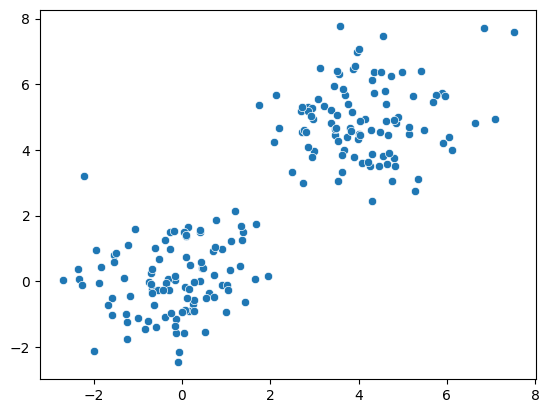

In [ ]:
sns.scatterplot(x=data[:, 0], y=data[:, 1])

In [ ]:
data.shape

(200, 2)

In [ ]:
initial_centroids = np.array([[0, 4], [2, -2]])
initial_centroids

array([[ 0,  4],
       [ 2, -2]])

<Axes: >

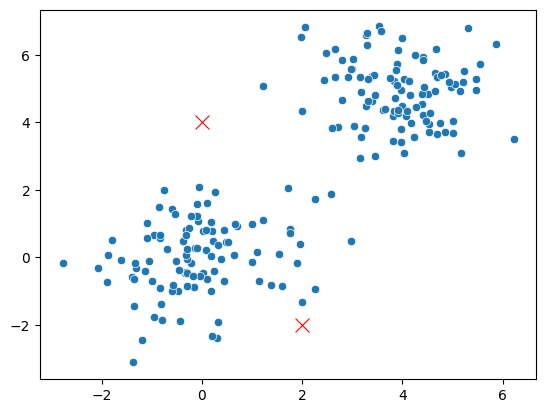

In [ ]:
sns.scatterplot(x=data[:, 0], y=data[:, 1])
sns.scatterplot(x=initial_centroids[:, 0], y=initial_centroids[:, 1], color='red', marker='x', s=100)

Каждой точке (объекту) поставим в соответствие лейбл (метку) кластера в зависимости от того, к какому центроиду эта точка ближе.

In [ ]:
dist_1 = ((initial_centroids[0] - data)**2).sum(axis=1)
dist_2 = ((initial_centroids[1] - data)**2).sum(axis=1)
labels = np.where(dist_1 <= dist_2, 0, 1)

<Axes: >

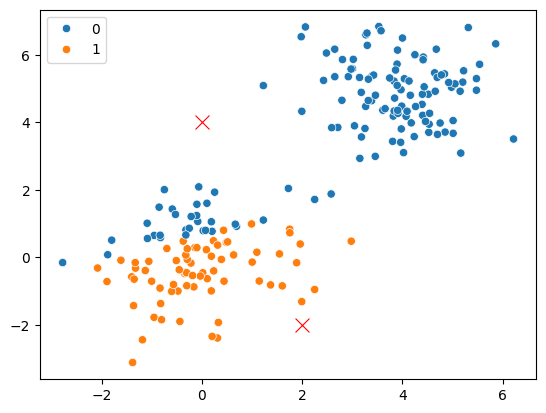

In [ ]:
sns.scatterplot(x=data[:, 0], y=data[:, 1], hue = labels)
sns.scatterplot(x=initial_centroids[:, 0], y=initial_centroids[:, 1], color='red', marker='x', s=100)

Теперь получили разделение:
* Синие точки - ближе к центроиду 0
* Рыжие точки - ближе к центроиду 1

Пересчитаем координаты центроидов:
* Отберем все "Синие" точки и найдем для них средние координаты x, y. Это будут координаты нового центроида для 0-го кластера.
* Отберем все "Рыжие" точки и найдем для них средние координаты x, y. Это будут координаты нового центроида для 1-го кластера.
* Переприсвоим лейблы точкам согласно новым центроидам.

In [ ]:
centriods_1 = np.array([data[labels==0].mean(axis=0), data[labels==1].mean(axis=0)])
dist_1 = ((centriods_1[0] - data)**2).sum(axis=1)
dist_2 = ((centriods_1[1] - data)**2).sum(axis=1)
labels_2 = np.where(dist_1 <= dist_2, 0, 1)

<Axes: >

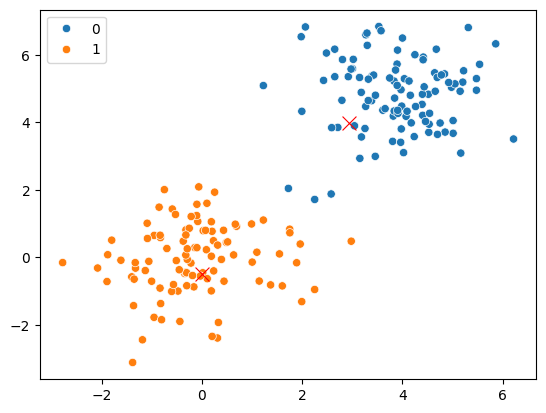

In [ ]:
sns.scatterplot(x=data[:, 0], y=data[:, 1], hue = labels_2)
sns.scatterplot(x=centriods_1[:, 0], y=centriods_1[:, 1], color='red', marker='x', s=100)

## Функция кластеризации для двух кластеров

In [ ]:
from IPython.display import display, clear_output
from time import sleep

def plot_result(data, centroids, labels):
    sns.scatterplot(x=data[:, 0], y=data[:, 1], hue = labels)
    sns.scatterplot(x=centroids[:, 0], y=centroids[:, 1], color='red', marker='x', s=100)

    clear_output(wait=True)
    plt.show()
    plt.clf()


def k_means(data:np.ndarray, max_iteration:int = 100)->np.ndarray:
  centroids = np.array([[0, 4], [2, -2]])
  iter_count = 0
  for _ in range(max_iteration):
    iter_count += 1
    dist_1 = ((centroids[0] - data)**2).sum(axis=1)**.5
    dist_2 = ((centroids[1] - data)**2).sum(axis=1)**.5
    labels = np.where(dist_1 <= dist_2, 0, 1)
    centroids_old = centroids
    centroids = np.array([data[labels==0].mean(axis=0), data[labels==1].mean(axis=0)])
    plot_result(data, centroids, labels)
    sleep(1)

    if np.allclose(centroids, centroids_old, rtol=1e-05, atol=1e-08, equal_nan=False):
      break

  print(f'Number of iterations - {iter_count}')
  return labels


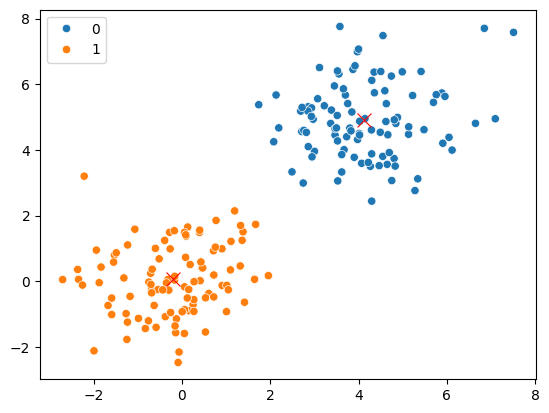

4


<Figure size 640x480 with 0 Axes>

In [ ]:
labels = k_means(data)

## Функция для произвольного количества кластеров и произвольного количества признаков

In [ ]:
def k_means(data:np.ndarray, n_clusters:int, max_iteration:int = 100)->np.ndarray:
  centroids = np.random.randn(n_clusters, data.shape[1])
  iter_count = 0

  for _ in range(max_iteration):
    iter_count += 1
    dist_to_claster = []
    for cluster in range(n_clusters):
      dist_to_claster.append(((centroids[cluster] - data)**2).sum(axis=1))
    dist_to_claster = np.array(dist_to_claster).T

    labels = np.argmin(dist_to_claster, axis=1)
    centroids_old = centroids
    centroids = np.array([data[labels==cluster].mean(axis=0) for cluster in range(n_clusters)])
    if np.allclose(centroids, centroids_old, rtol=1e-05, atol=1e-08, equal_nan=False):
      break

  print(iter_count)
  return labels

5


<Axes: >

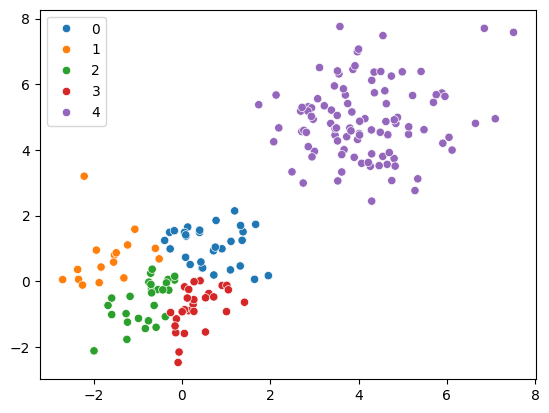

In [ ]:
labels = k_means(data, 5)
sns.scatterplot(x=data[:, 0], y=data[:, 1], hue = labels, palette='tab10')

# Попрактикуемся на новом наборе данных.

Давайте создадим двумерный набор данных, содержащий четыре отдельных больших двоичных объекта.

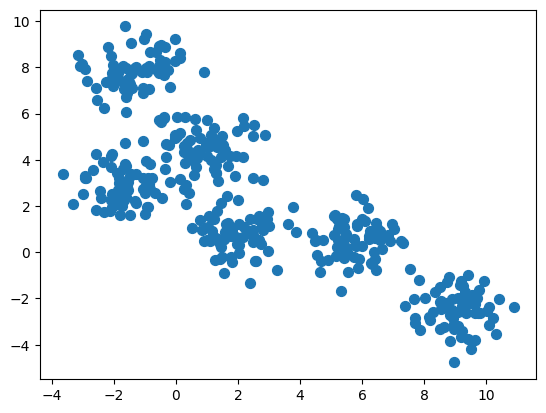

In [ ]:
X, y_true = make_blobs(n_samples=400, centers=6,
                       cluster_std=0.80, random_state=0)
plt.scatter(X[:, 0], X[:, 1], s=50);

Применим написанную нами выше функцию кластеризации для произвольного количества кластеров и укажем их количество равное 6.

7


<Axes: >

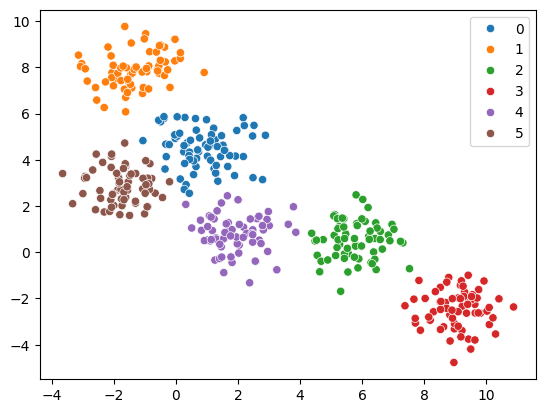

In [ ]:
labels = k_means(X, 6)
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue = labels, palette='tab10')

Написанная нами выше функция иногда работает с ошибкой. Попробуйте это исправить)

# SKlearn KMeans

Documentation



```
from sklearn.cluster import KMeans
import numpy as np

X = np.array([[1, 2], [1, 4], [1, 0],
              [10, 2], [10, 4], [10, 0]])

kmeans = KMeans(n_clusters=2, random_state=0, n_init="auto")
kmeans.fit(X)
kmeans.labels_
kmeans.predict([[0, 0], [12, 3]])
kmeans.cluster_centers_
```



## TASK

- Написать кластеризацию Kmeans
- Найти опмтимальное количество k, используя методы Silhouette score и Elbow rule
- Визуализация после кластеризация (задать каждому кластеру свой цвет)

In [ ]:
from sklearn.cluster import KMeans

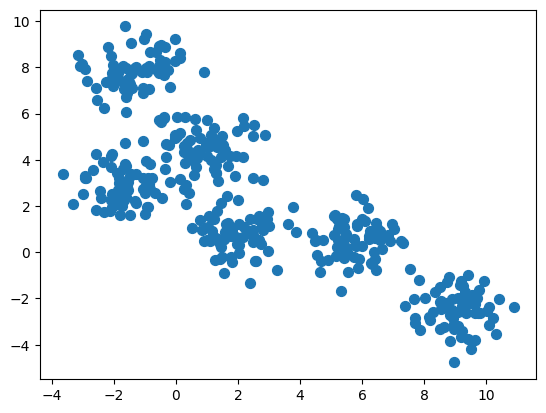

In [ ]:
X, y_true = make_blobs(n_samples=400, centers=6,
                       cluster_std=0.80, random_state=0)
plt.scatter(X[:, 0], X[:, 1], s=50)

Достанем "из коробки" алгоритм KMeans и обучем его выделять из данных выбранное количество кластеров!

In [ ]:
algorithm = KMeans(n_clusters=6)
algorithm.fit(X) # И ЭТО ВСЕЕЕ ?????  - ДЯ!

KMeans(n_clusters=6)

In [ ]:
labels = algorithm.labels_
labels

array([4, 2, 3, 2, 1, 2, 1, 1, 5, 3, 2, 4, 5, 1, 2, 1, 2, 0, 5, 3, 1, 5,
       5, 3, 0, 4, 2, 1, 2, 1, 1, 3, 3, 1, 5, 3, 0, 3, 4, 4, 2, 0, 3, 2,
       1, 4, 0, 5, 1, 3, 3, 1, 5, 1, 3, 2, 2, 0, 1, 2, 0, 1, 2, 0, 1, 3,
       3, 0, 2, 0, 5, 5, 1, 5, 3, 2, 4, 5, 4, 3, 4, 4, 4, 3, 4, 3, 1, 0,
       0, 5, 4, 1, 3, 1, 3, 4, 3, 2, 5, 0, 0, 4, 4, 2, 5, 2, 2, 2, 5, 2,
       1, 3, 4, 0, 2, 3, 5, 4, 3, 5, 4, 1, 0, 0, 4, 2, 5, 2, 3, 2, 0, 1,
       4, 0, 1, 1, 1, 4, 5, 0, 0, 4, 2, 5, 5, 0, 5, 0, 2, 5, 0, 0, 4, 4,
       2, 5, 2, 3, 2, 4, 3, 1, 3, 0, 0, 1, 3, 1, 0, 2, 5, 4, 4, 2, 0, 0,
       2, 5, 3, 1, 4, 0, 4, 1, 0, 1, 2, 1, 0, 5, 0, 5, 4, 5, 0, 2, 5, 0,
       1, 1, 2, 5, 5, 2, 4, 5, 5, 4, 0, 3, 0, 0, 1, 1, 5, 5, 5, 3, 1, 0,
       5, 4, 0, 5, 4, 2, 5, 3, 1, 1, 4, 3, 3, 0, 3, 4, 3, 5, 0, 0, 2, 0,
       1, 4, 5, 0, 5, 2, 5, 5, 4, 4, 3, 2, 3, 2, 3, 2, 4, 5, 3, 2, 1, 5,
       2, 5, 1, 4, 5, 2, 2, 2, 4, 3, 5, 5, 3, 3, 3, 3, 3, 0, 0, 3, 0, 3,
       5, 1, 1, 4, 1, 1, 4, 4, 0, 1, 5, 3, 0, 5, 1,

In [ ]:
cluster_centers = algorithm.cluster_centers_
cluster_centers

array([[ 9.09032378, -2.44633855],
       [-1.72117978,  2.86647542],
       [-1.32694691,  7.88517673],
       [ 1.94164183,  0.77895462],
       [ 5.78822673,  0.49468133],
       [ 0.87464135,  4.47003977]])

In [ ]:
algorithm.inertia_ # WSCC

485.59315204765346

<Axes: >

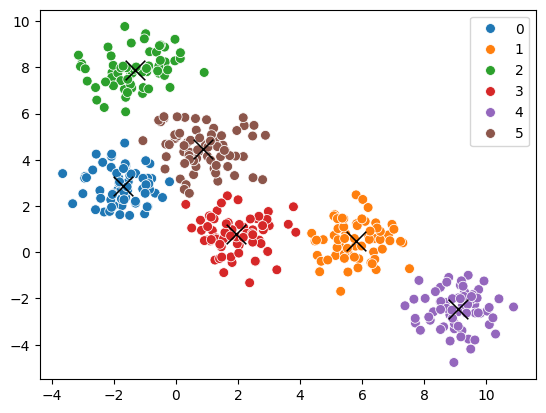

In [ ]:
sns.scatterplot(x=X[:, 0], y=X[:, 1], s=50, hue=labels, palette='tab10')
sns.scatterplot(x=cluster_centers[:, 0], y=cluster_centers[:, 1], color='black', marker='x', s=200)

Попробуем разные другие количества кластеров:


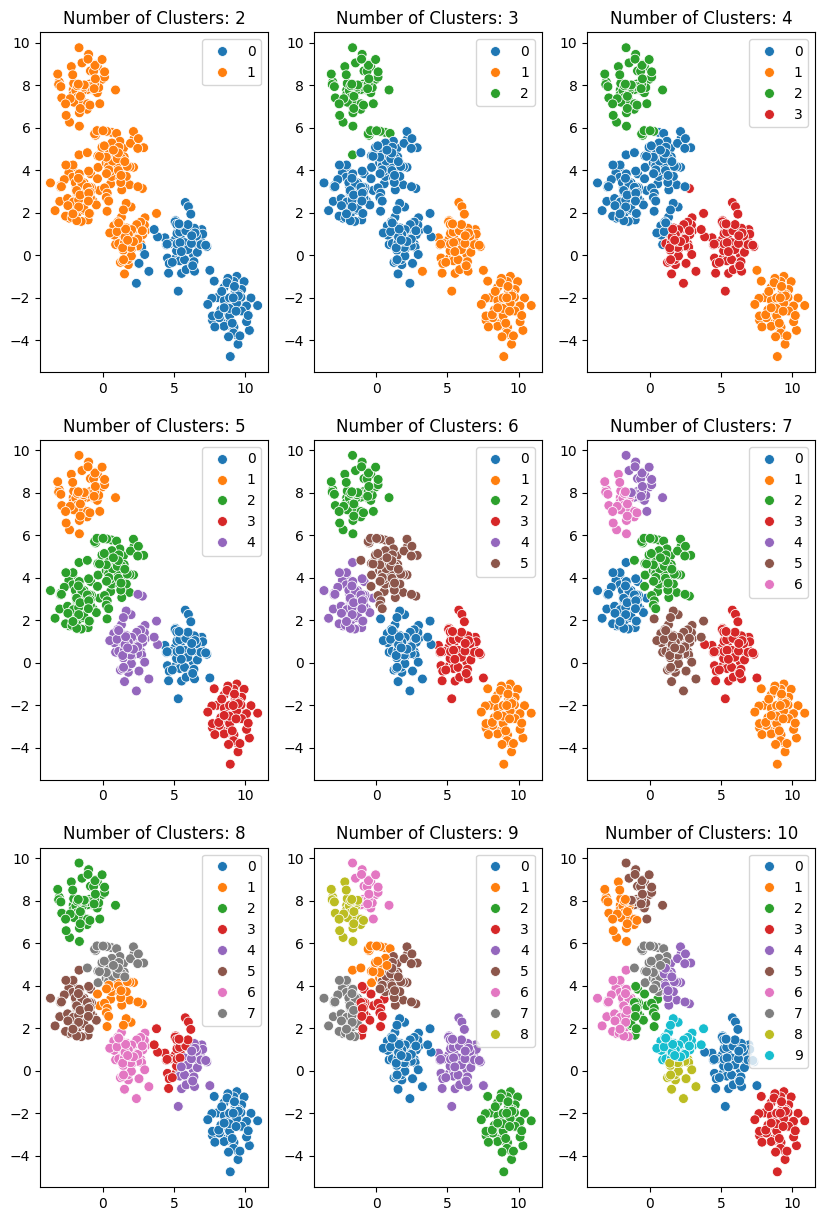

In [ ]:
kluster_map = np.array([[2, 3, 4], [5, 6, 7], [8, 9, 10]])

def cluster_(data:np.ndarray, n_clusters:int)->np.ndarray:
  algorithm = KMeans(n_clusters=n_clusters)
  algorithm.fit(data)
  return algorithm.labels_

fig, ax = plt.subplots(3, 3, figsize=(10, 15))

for i in range(3):
  for j in range(3):
    sns.scatterplot(x=X[:, 0], y=X[:, 1], s=50, hue=cluster_(X, kluster_map[i, j]), palette='tab10', ax=ax[i, j]).set_title(f'Number of Clusters: {kluster_map[i, j]}')


# Elbow Rule

Метод локтя (Elbow Rule) – один из самых известных методов, с помощью которого вы
можете выбрать правильное значение k и повысить производительность Модели.
Основная идея, лежащая в основе k-means, заключается в определении таких
кластеров, что отклонения внутри каждого кластера минимальны. Чтобы оценить
отклонение, мы вычислим такую величину, как WCSS (within-cluster sum of squares) –
cумму квадратов внутрикластерных расстояний до центра кластера.

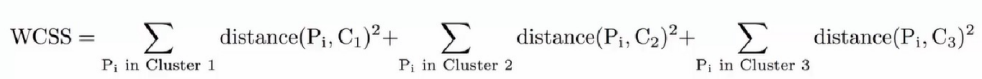

In [ ]:
n_clusters_min = 2
n_clusters_max = 15

wcss_list = []
for i in range(n_clusters_min, n_clusters_max+1):
  kmeans = KMeans(n_clusters=i)
  kmeans.fit(X)
  wcss_list.append(kmeans.inertia_)


<Axes: >

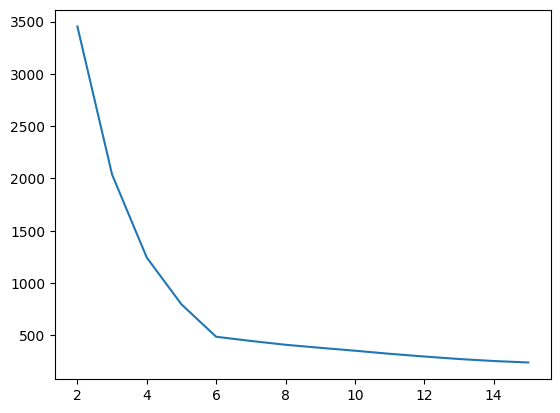

In [ ]:
sns.lineplot(x=range(n_clusters_min, n_clusters_max+1), y=wcss_list)

Точка самого очевидного излома соответствует 6-ти кластерам. Это и есть оптимальное количество кластеров.

# Silhouette Method

Метод силуэта также используется для определения оптимального числа кластеров в алгоритме кластеризации. Он оценивает качество кластеризации путем измерения, насколько каждая точка данных похожа на свой кластер по сравнению с другими кластерами. Значение силуэта находится в диапазоне от -1 до 1, где ближе к 1 означает, что точка хорошо соответствует своему кластеру и плохо - другим кластерам.

In [ ]:
from sklearn.metrics import silhouette_score

In [ ]:
n_clusters_min = 2
n_clusters_max = 15

silhouette_scores = []
for k in range(n_clusters_min, n_clusters_max+1):
    kmeans = KMeans(n_clusters=k, random_state=0)
    labels = kmeans.fit_predict(X)
    silhouette_avg = silhouette_score(X, labels)
    silhouette_scores.append(silhouette_avg)

<Axes: >

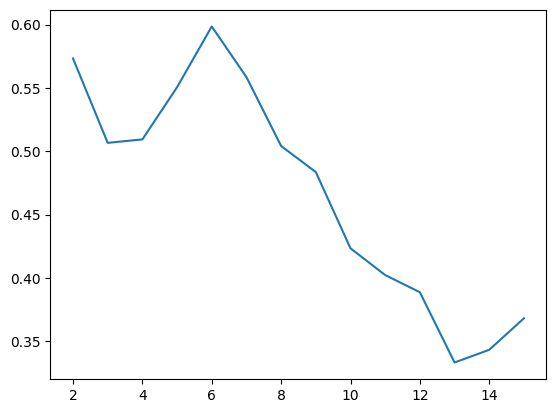

In [ ]:
sns.lineplot(x=range(n_clusters_min, n_clusters_max+1), y=silhouette_scores)

# TASK 2: Mouse dataset

- Написать кластеризацию Kmeans для mouse dataset
- Найти опмтимальное количество k, используя методы Silhouette score и Elbow rule
- Визуализация после кластеризация (задать каждому кластеру свой цвет)
- Сделать выводы о качестве кластеризации.

https://elki-project.github.io/datasets/

In [2]:
!wget 'https://www.dropbox.com/scl/fi/j2dzpj4vddg7xal8tr9jc/mouse.csv?rlkey=5hcwfdf91mpqn5vjkvsxnt0fu&dl=0'

--2024-06-10 09:47:54--  https://www.dropbox.com/scl/fi/j2dzpj4vddg7xal8tr9jc/mouse.csv?rlkey=5hcwfdf91mpqn5vjkvsxnt0fu&dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.6.18, 2620:100:6019:18::a27d:412
Connecting to www.dropbox.com (www.dropbox.com)|162.125.6.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://uc068345de000beb8f3bbe195f46.dl.dropboxusercontent.com/cd/0/inline/CUiAVkNGELwMHVu26HAIIzfWRfC_vabGO3UvNk_5yhKA032NstzjoZekysMNDT_FCmKxgOiECDUcAMFNd8CVckJ8Z8zo8RKcpgH3c1fy6zotm6L2MqXZRO8MlvvJipW1apOTfAquckvSoqyXsKw4E4fY/file# [following]
--2024-06-10 09:47:54--  https://uc068345de000beb8f3bbe195f46.dl.dropboxusercontent.com/cd/0/inline/CUiAVkNGELwMHVu26HAIIzfWRfC_vabGO3UvNk_5yhKA032NstzjoZekysMNDT_FCmKxgOiECDUcAMFNd8CVckJ8Z8zo8RKcpgH3c1fy6zotm6L2MqXZRO8MlvvJipW1apOTfAquckvSoqyXsKw4E4fY/file
Resolving uc068345de000beb8f3bbe195f46.dl.dropboxusercontent.com (uc068345de000beb8f3bbe195f46.dl.dropboxusercontent.com)... 162.125.4.15, 2620

In [3]:
df = pd.read_csv('mouse.csv?rlkey=5hcwfdf91mpqn5vjkvsxnt0fu&dl=0', sep=' ')

df.head()

,x1,x2,type
0,0.456601,0.432806,Head
1,0.611378,0.528625,Head
2,0.450299,0.711606,Head
3,0.639015,0.460744,Head
4,0.628957,0.323470,Head


<Axes: xlabel='x1', ylabel='x2'>

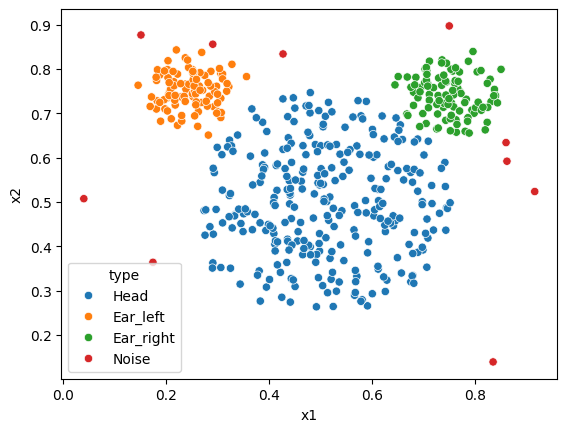

In [4]:
sns.scatterplot(x=df['x1'], y=df['x2'], hue=df['type'])

In [10]:
arr = df.loc[df['type']!='Noise',['x1', 'x2']].to_numpy()

In [11]:
from sklearn.cluster import KMeans

In [12]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(arr)
label = kmeans.labels_

<Axes: >

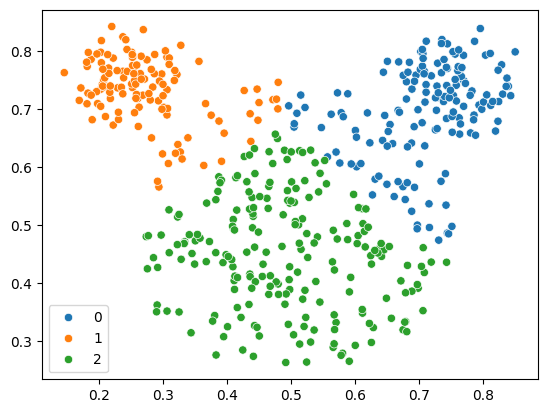

In [14]:
sns.scatterplot(x=arr[:, 0], y=arr[:, 1], hue=label, palette='tab10')

In [21]:
n_clusters_min = 2
n_clusters_max = 15

wcss_list = []
for i in range(n_clusters_min, n_clusters_max+1):
  kmeans = KMeans(n_clusters=i)
  kmeans.fit(arr)
  wcss_list.append(kmeans.inertia_)


<Axes: >

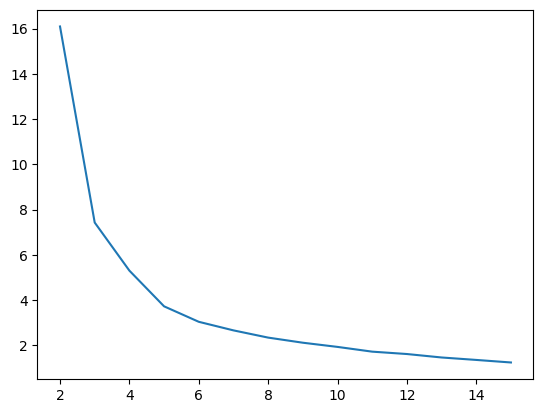

In [22]:
sns.lineplot(x=range(n_clusters_min, n_clusters_max+1), y=wcss_list)

In [25]:
from sklearn.cluster import DBSCAN

In [26]:
arr = df[[ 'x1', 'x2']].to_numpy()

In [82]:
dbscan = DBSCAN(eps=0.1, min_samples=55)
label = dbscan.fit_predict(arr)

<Axes: >

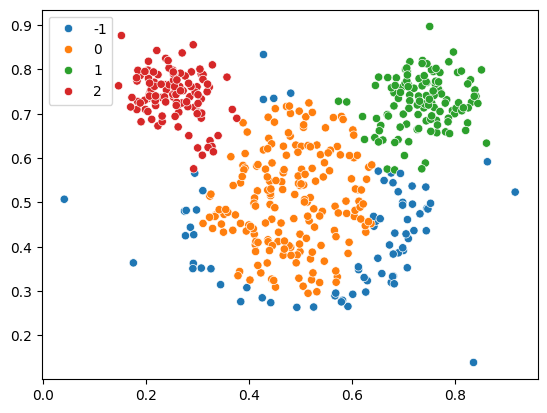

In [83]:
sns.scatterplot(x=arr[:, 0], y=arr[:, 1], hue=label, palette='tab10')

# TASK 3

Решите задачу кластеризации используя `Kmeans` используя массив `data`.

In [15]:
t = np.linspace(0, 2*np.pi, 1000)
x = 3*np.sin(t) + np.random.randn(1000)*.2
y = 4*np.cos(t) + np.random.randn(1000)*.2
x_1 = 6*np.sin(t) + np.random.randn(1000)*.2
y_1 = 8*np.cos(t) + np.random.randn(1000)*.2
data = np.concatenate((np.array([x,y]).T, np.array([x_1,y_1]).T), axis=0)

<Axes: >

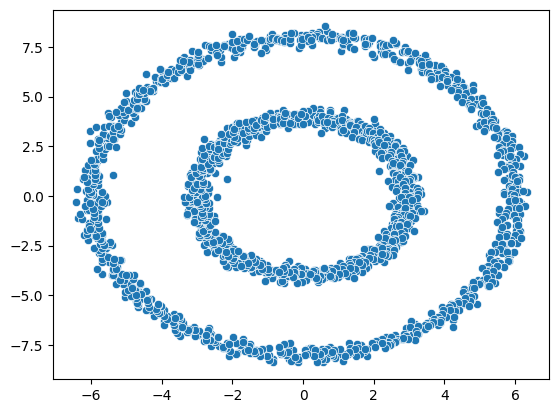

In [16]:
sns.scatterplot(x=data[:, 0], y=data[:, 1])

In [84]:
dbscan = DBSCAN(eps=1, min_samples=5)
label = dbscan.fit_predict(data)

<Axes: >

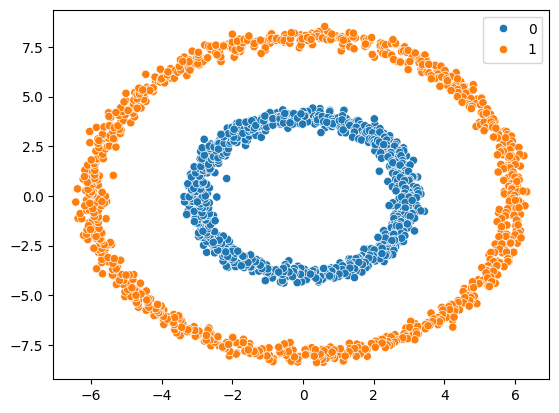

In [85]:
sns.scatterplot(x=data[:, 0], y=data[:, 1], hue=label, palette='tab10')

In [19]:
kmeans = KMeans(n_clusters=10)
kmeans.fit(data)
label = kmeans.labels_

<Axes: >

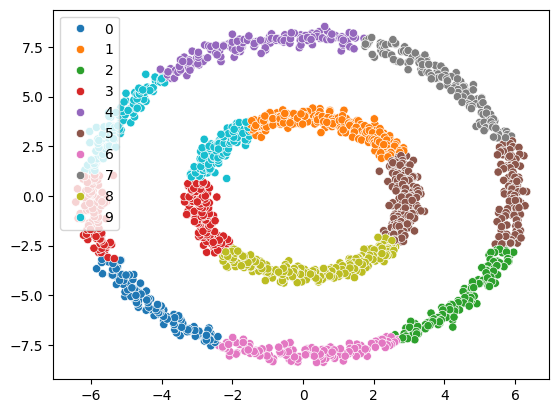

In [20]:
sns.scatterplot(x=data[:, 0], y=data[:, 1], hue=label, palette='tab10')